In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('data_crime.csv')
df.head()



,State,Month,Crime_Type,Crime_Percentage
0,Delhi NCR,January,Theft,2.33
1,Delhi NCR,January,Robbery,0.46
2,Delhi NCR,January,Assault,3.98
3,Delhi NCR,January,Cybercrime,1.34
4,Delhi NCR,January,Murder,0.83


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 State               0
Month               0
Crime_Type          0
Crime_Percentage    0
dtype: int64


In [ ]:
import pandas as pd
crime_df = pd.read_csv("data_crime.csv")


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical columns
categorical_features = ["State", "Month", "Crime_Type"]
target_column = "Crime_Percentage"

# Separate features and target
X = crime_df.drop(target_column, axis=1)
y = crime_df[target_column]

# Define a column transformer to encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=True), categorical_features)  # Use sparse encoding
    ]
)

# Create a pipeline to preprocess the data and scale features
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler(with_mean=False))  # Avoid centering to support sparse matrices
])

# Transform the features
X_transformed = pipeline.fit_transform(X)

# Output the transformed data shape
print("Transformed data shape:", X_transformed.shape)


Transformed data shape: (756, 25)


In [ ]:
# Check for duplicates
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)


No duplicates found.


In [ ]:
# Check for null values
null_values = df.isnull().sum()

if null_values.sum() == 0:
    print("No null values found.")
else:
    print("Null values found:")
    print(null_values)


No null values found.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Summary Statistics
print("Summary Statistics:\n", df.describe())



Summary Statistics:
        Crime_Percentage
count        756.000000
mean           2.530886
std            1.384360
min            0.100000
25%            1.400000
50%            2.505000
75%            3.660000
max            5.000000


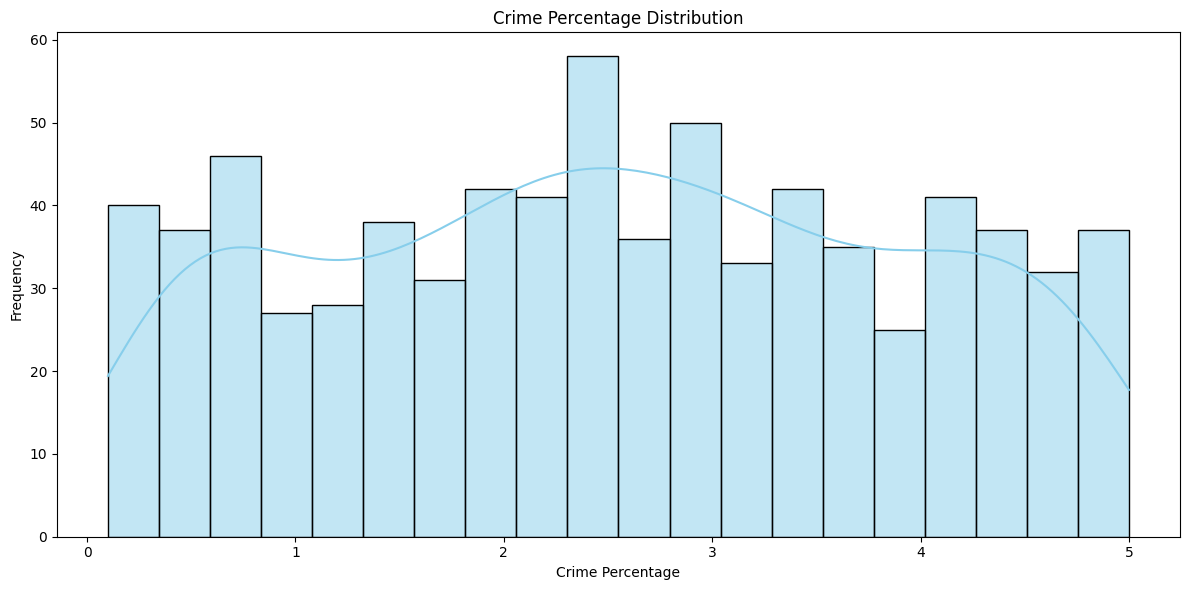

<ipython-input-69-395bd912a1d5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='Crime_Percentage', data=crime_df, palette='coolwarm')
<ipython-input-69-395bd912a1d5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Crime_Percentage', data=crime_df, palette='coolwarm')
<ipython-input-69-395bd912a1d5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crime_Type', y='Crime_Percentage', data=crime_df, palette='coolwarm')


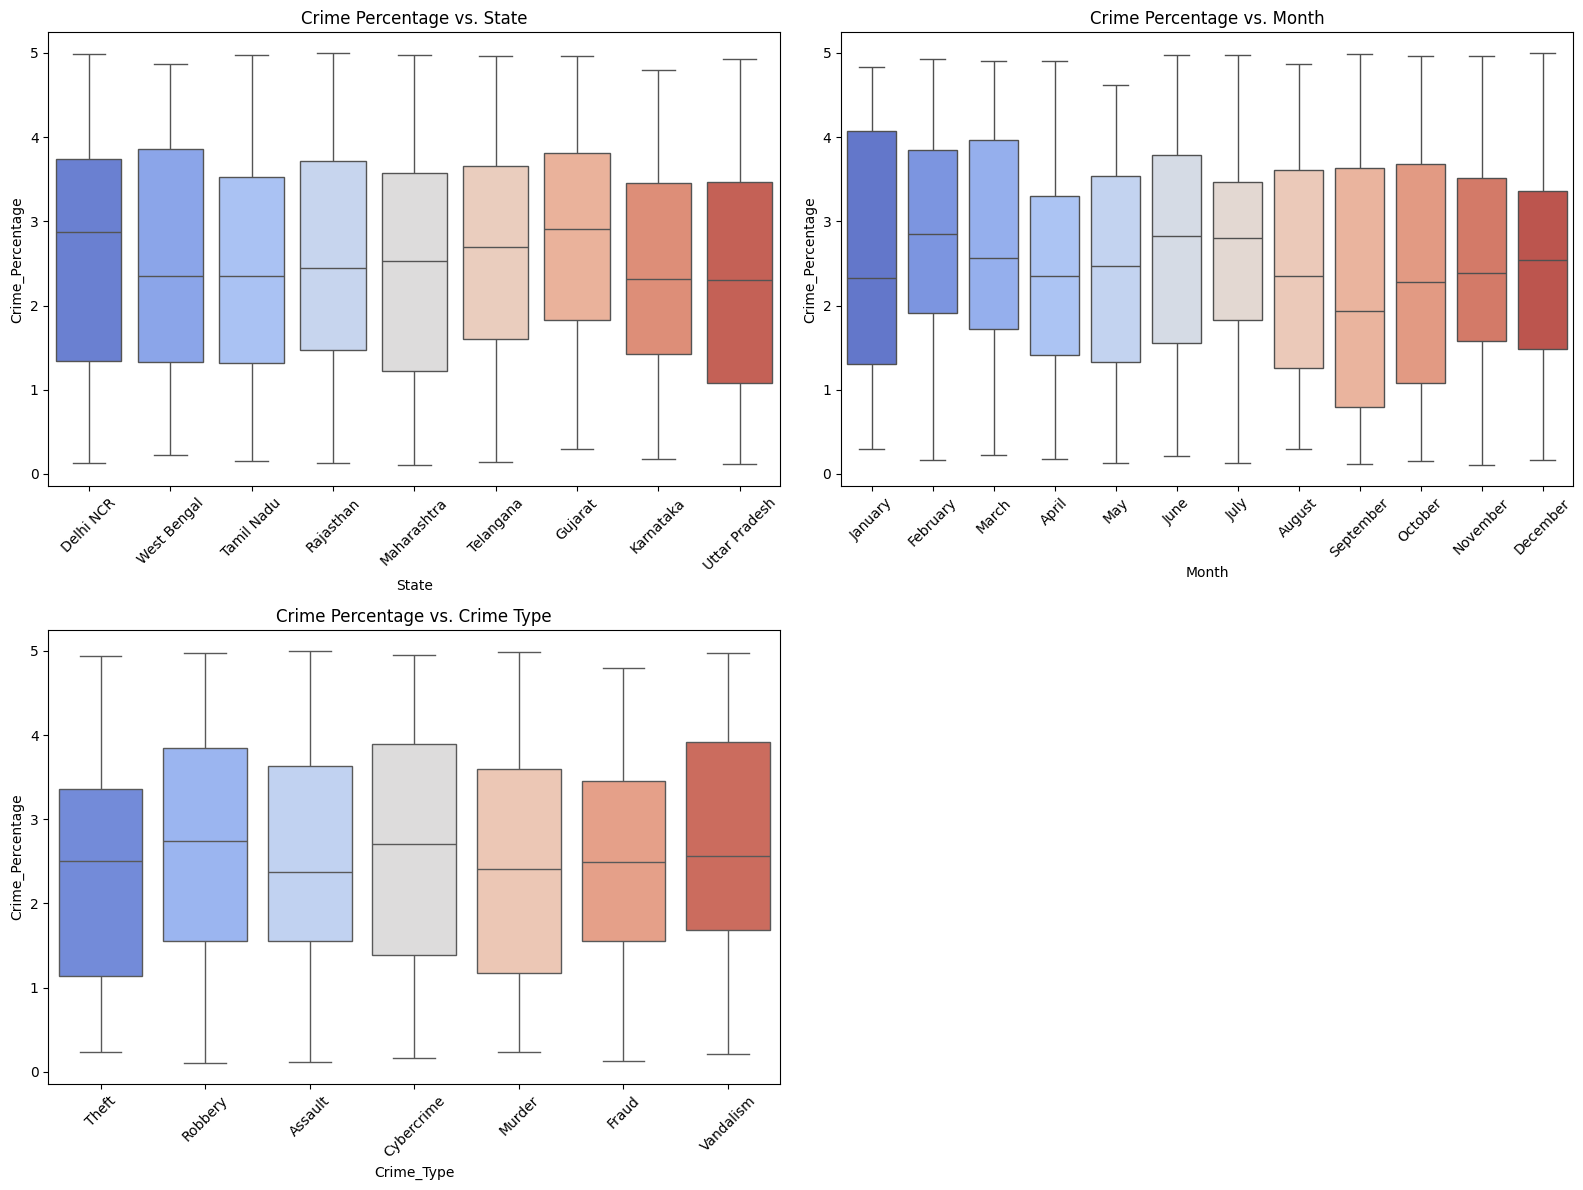

In [ ]:
## Univariate Analysis for Crime_Percentage
plt.figure(figsize=(12, 6))

# Histogram of Crime_Percentage
plt.subplot(1, 1, 1)
sns.histplot(crime_df['Crime_Percentage'], kde=True, bins=20, color='skyblue')
plt.title('Crime Percentage Distribution')
plt.xlabel('Crime Percentage')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

# Bivariate Analysis for Crime_Percentage
plt.figure(figsize=(16, 12))

# Crime Percentage by State
plt.subplot(2, 2, 1)
sns.boxplot(x='State', y='Crime_Percentage', data=crime_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Crime Percentage vs. State')

# Crime Percentage by Month
plt.subplot(2, 2, 2)
sns.boxplot(x='Month', y='Crime_Percentage', data=crime_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Crime Percentage vs. Month')

# Crime Percentage by Crime Type
plt.subplot(2, 2, 3)
sns.boxplot(x='Crime_Type', y='Crime_Percentage', data=crime_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Crime Percentage vs. Crime Type')

plt.tight_layout()
plt.show()



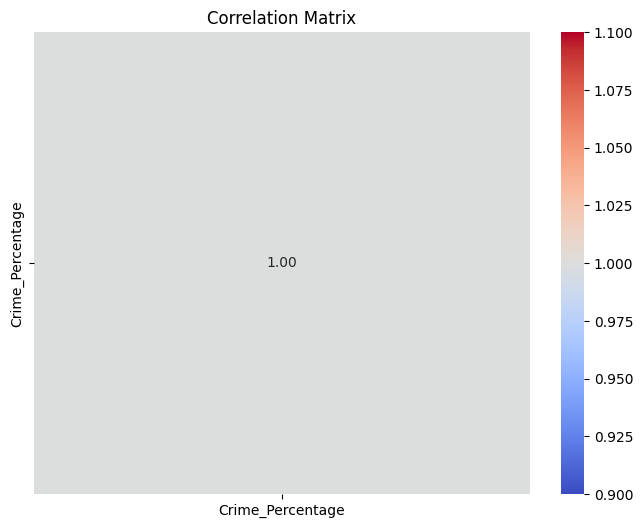

In [ ]:

# Correlation Matrix for Numeric Data
plt.figure(figsize=(8, 6))

# Selecting only numeric columns for correlation calculation
numeric_columns = crime_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = crime_df[numeric_columns].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Crime_Percentage distribution:
count    756.000000
mean       2.530886
std        1.384360
min        0.100000
25%        1.400000
50%        2.505000
75%        3.660000
max        5.000000
Name: Crime_Percentage, dtype: float64
Using threshold of 2.505 for classification.

Model: Random Forest


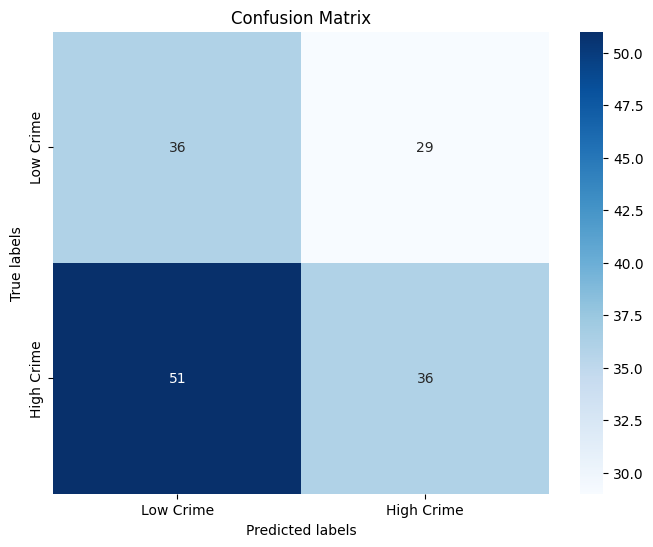


Model: Logistic Regression


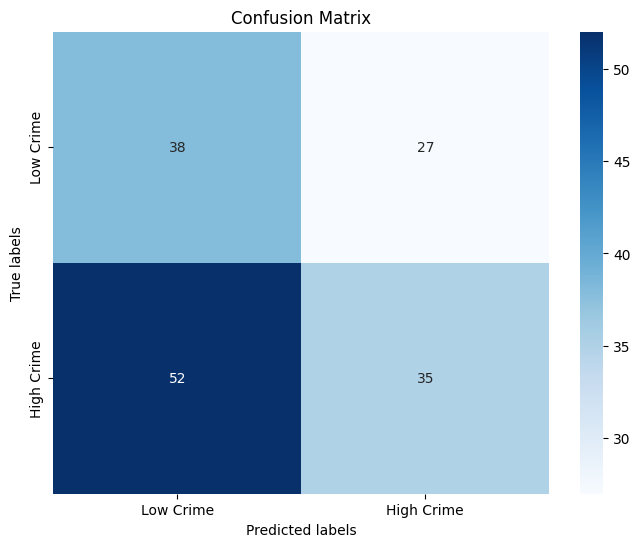


Model: SVM


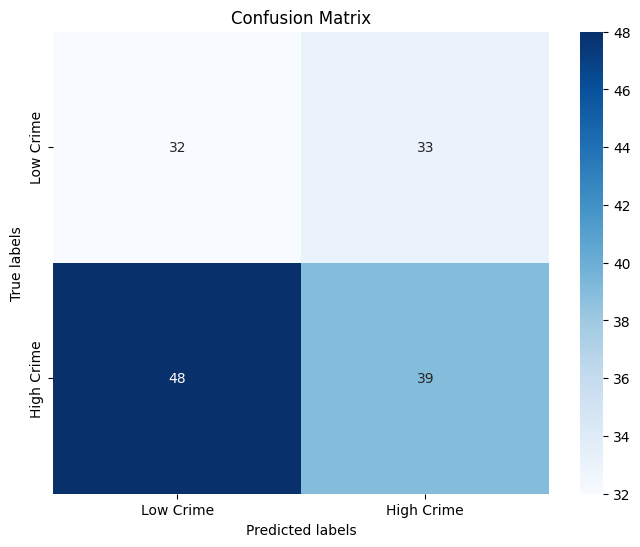


Model: Decision Tree


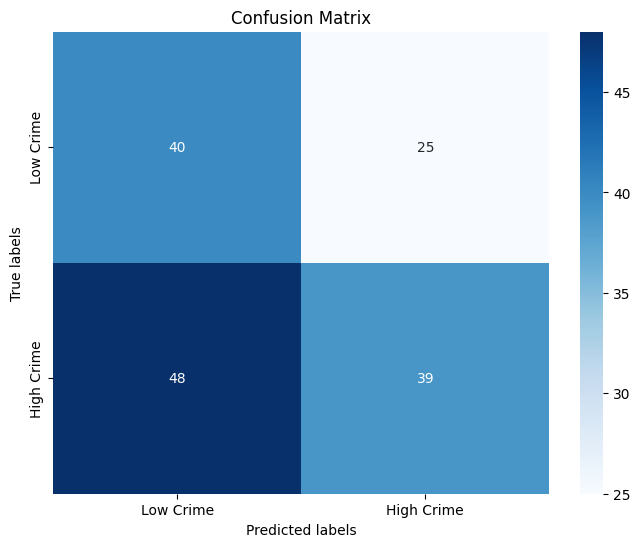


Model: KNN


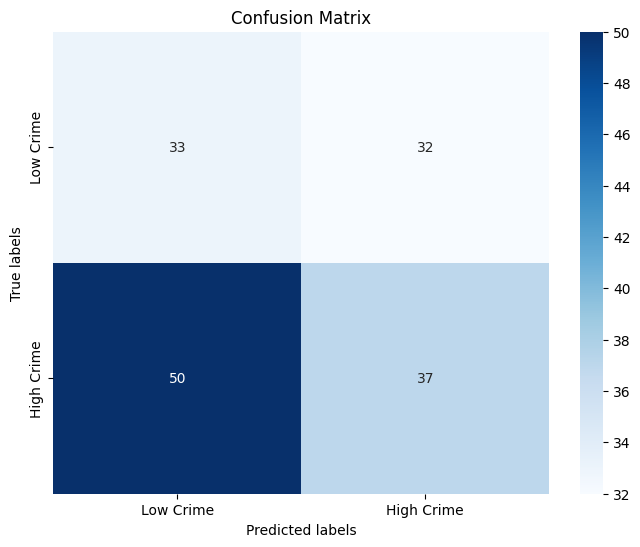


Model: Gradient Boosting


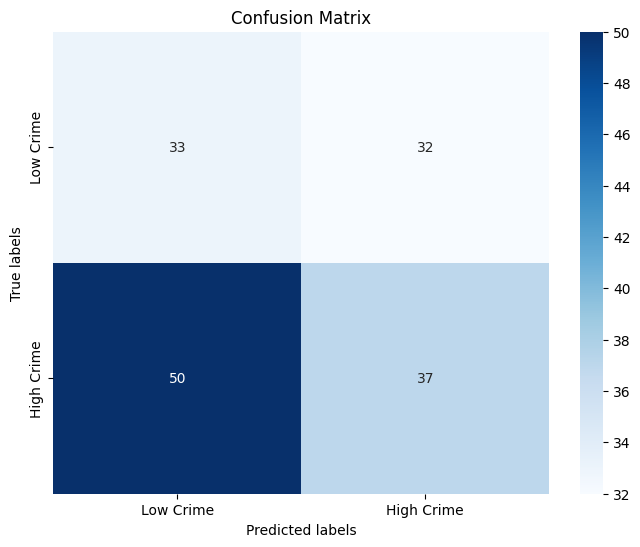

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.linear_model import LogisticRegression  # For classification
from sklearn.svm import SVC  # For classification
from sklearn.tree import DecisionTreeClassifier  # For classification
from sklearn.neighbors import KNeighborsClassifier  # For classification
from sklearn.ensemble import GradientBoostingClassifier  # For classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure the correct path)
data = pd.read_csv('data_crime.csv')

# Assume 'Crime_Percentage' is the target variable
X = data.drop('Crime_Percentage', axis=1)
y = data['Crime_Percentage']

# Check the distribution of Crime_Percentage
print("Crime_Percentage distribution:")
print(y.describe())

# Dynamically set the threshold for classification based on quantiles
threshold = y.quantile(0.5)  # Median value, or you can set a custom threshold
print(f"Using threshold of {threshold} for classification.")

# Create a binary target variable: High Crime (1) or Low Crime (0)
y_binary = np.where(y > threshold, 1, 0)  # 1 for High Crime, 0 for Low Crime

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Define classifiers
models = {
    'Random Forest': RandomForestClassifier(n_estimators=65, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Train models and calculate confusion matrix
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict the labels
    y_pred = model.predict(X_test)

    # Calculate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nModel: {model_name}")
    plot_confusion_matrix(cm, labels=['Low Crime', 'High Crime'])


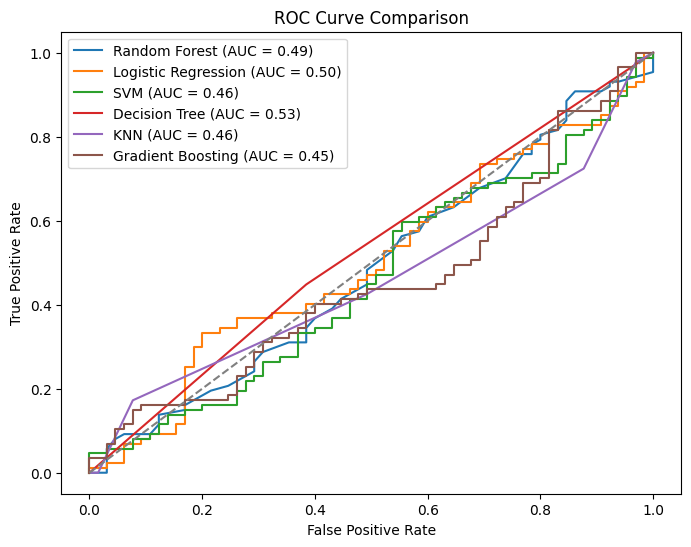

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create a figure for plotting the ROC curves
plt.figure(figsize=(8, 6))

# Loop over each model and calculate the ROC curve
for model_name, model in models.items():
    # Get the probabilities of the positive class (1) for binary classification
    if hasattr(model, 'predict_proba'):  # Most classifiers have 'predict_proba'
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    else:  # For models like SVM that don't have 'predict_proba', use decision_function if available
        y_probs = model.decision_function(X_test)  # Decision function provides raw scores

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot the diagonal line for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('data_crime.csv')

# Check the unique values in the target variable
print(data['Crime_Percentage'].unique())

# If the target variable is continuous but needs to be categorical, bin it into categories
data['Crime_Percentage'] = data['Crime_Percentage'].apply(lambda x: 1 if x > 0 else 0)  # Example: binary classification

# Alternatively, if the target variable is categorical (like 'Low Crime' or 'High Crime'), you can encode them:
# label_encoder = LabelEncoder()
# data['Disaster_Occurrence'] = label_encoder.fit_transform(data['Disaster_Occurrence'])

# One-hot encode the categorical features (e.g., 'State' or 'Crime_Type')
data_encoded = pd.get_dummies(data, drop_first=True)

# Split data into features (X) and target (y)
X = data_encoded.drop('Crime_Percentage', axis=1)
y = data_encoded['Crime_Percentage']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=65, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[2.33 0.46 3.98 1.34 0.83 0.63 4.77 3.8  4.66 4.37 1.17 2.74 2.63 4.09
 4.72 4.61 1.27 0.29 1.88 0.34 4.74 1.43 3.31 1.87 4.05 1.33 4.3  0.23
 3.66 0.13 3.47 3.6  2.54 0.91 4.48 2.13 3.32 1.09 2.27 2.71 3.34 2.87
 4.07 2.89 3.57 2.61 2.22 1.36 3.37 0.3  3.7  2.29 0.78 1.92 3.61 4.99
 0.75 2.2  1.14 3.74 3.02 3.29 2.53 4.28 4.68 0.64 1.94 3.78 3.24 3.19
 3.   4.15 0.77 3.16 1.23 3.23 3.76 4.18 1.53 4.59 4.02 1.6  4.   4.7
 4.32 2.15 2.4  1.32 3.72 2.34 1.46 1.5  3.86 4.71 1.2  2.03 2.09 1.71
 1.65 2.47 2.35 2.43 1.38 3.88 1.98 4.64 4.87 3.42 2.6  2.76 4.03 1.
 2.01 2.98 2.8  0.58 2.84 0.99 0.44 4.78 2.25 1.75 0.52 2.75 2.26 0.92
 4.1  0.43 1.08 1.89 0.38 1.54 4.17 1.93 2.17 4.08 0.62 3.5  2.67 0.25
 4.19 1.04 3.14 2.65 2.73 3.05 0.5  1.02 0.17 1.4  3.33 4.11 1.44 4.38
 2.42 4.55 3.04 2.83 3.08 1.39 0.72 1.9  4.62 4.45 0.48 4.98 0.65 1.3
 4.95 3.4  0.21 3.11 2.16 0.15 4.76 2.05 0.82 0.33 1.67 3.79 1.05 2.51
 1.72 4.46 1.56 1.76 2.24 1.62 1.79 2.77 1.95 2.92 4.13 2.21 2.39 4.27
 0.37 2.32

In [ ]:
import joblib

# Initialize and train logistic regression model
clf = RandomForestClassifier(n_estimators=65, random_state=42)
clf.fit(X_train, y_train)

# Save the model to a joblib file
joblib.dump(clf, 'AI_based_crime_prediction_model.joblib')

['AI_based_crime_prediction_model.joblib']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load the dataset
data = pd.read_csv('data_crime.csv')

# Preprocess the dataset
X = data[['State', 'Month', 'Crime_Type']]
y = data['Crime_Percentage']

# OneHotEncoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('state_month_crime', OneHotEncoder(handle_unknown='ignore'), ['State', 'Month', 'Crime_Type'])
    ])

# RandomForestRegressor model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X, y)

# Save the model for future use
joblib.dump(model, 'AI_Crime_Prediction_Model.joblib')

# Load the trained model
model = joblib.load('AI_Crime_Prediction_Model.joblib')

# Function to predict crime percentage
def predict_crime_percentage():
    # Take user input
    state = input("Enter State (e.g., Delhi NCR, Mumbai, Telangana): ").strip().title()
    month = input("Enter Month (e.g., January, February): ").strip().title()
    crime_type = input("Enter Crime Type (e.g., Theft, Robbery, Assault, Cybercrime, Murder, Fraud, Vandalism): ").strip().title()

    # Prepare input data
    user_input = pd.DataFrame({
        'State': [state],
        'Month': [month],
        'Crime_Type': [crime_type]
    })

    try:
        # Use the model to predict
        crime_percentage_prediction = model.predict(user_input)[0]

        # Print the prediction
        print(f"The predicted Crime Percentage for {crime_type} in {state} during {month} is: {crime_percentage_prediction:.2f}%")
    except Exception as e:
        # Display a more user-friendly message
        print(f"Error: {str(e)}. Please check your inputs and try again.")

# Test the function
predict_crime_percentage()


Enter State (e.g., Delhi NCR, Mumbai, Telangana): kerala
Enter Month (e.g., January, February): march
Enter Crime Type (e.g., Theft, Robbery, Assault, Cybercrime, Murder, Fraud, Vandalism): theft
The predicted Crime Percentage for Theft in Kerala during March is: 3.30%
